In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from an Excel file
walmart_data = pd.read_excel("/Users/ptsaravanan/Documents/Walmart Sales.xlsx")



In [249]:
walmart_data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Payment,Rating,Date_Time,Month,Total Sales
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,Ewallet,9.1,2019-01-05 13:08:00,1,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,Cash,9.6,2019-03-08 10:29:00,3,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,Credit card,7.4,2019-03-03 13:23:00,3,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,Ewallet,8.4,2019-01-27 20:33:00,1,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,Ewallet,5.3,2019-02-08 10:37:00,2,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,Ewallet,6.2,2019-01-29 13:46:00,1,40.35
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,Ewallet,4.4,2019-03-02 17:16:00,3,973.80
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,Cash,7.7,2019-02-09 13:22:00,2,31.84
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,Cash,4.1,2019-02-22 15:33:00,2,65.82


In [248]:
#checking for null values and data_type
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1000 non-null   object        
 1   Branch         1000 non-null   object        
 2   City           1000 non-null   object        
 3   Customer type  1000 non-null   object        
 4   Gender         1000 non-null   object        
 5   Product line   1000 non-null   object        
 6   Unit price     1000 non-null   float64       
 7   Quantity       1000 non-null   int64         
 8   Payment        1000 non-null   object        
 9   Rating         1000 non-null   float64       
 10  Date_Time      1000 non-null   datetime64[ns]
 11  Month          1000 non-null   int32         
 12  Total Sales    1000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(7)
memory usage: 97.8+ KB


In [220]:
#no null values
#incorrect data type for 'Date' and 'Time' column

In [221]:
#correcting data_type for 'Date' and 'Time' by creating 'Date_Time' column

# Convert 'Date' and 'Time' columns to string
walmart_data["Date"] = walmart_data["Date"].astype(str)
walmart_data["Time"] = walmart_data["Time"].astype(str)

# Concatenate 'Date' and 'Time' columns with a space in between
walmart_data["Date_Time"] = walmart_data["Date"] + ' ' + walmart_data["Time"]

# Convert the concatenated column to a datetime object
walmart_data["Date_Time"] = pd.to_datetime(walmart_data["Date_Time"])

# Drop 'Date' and 'Time' columns
walmart_data = walmart_data.drop(columns=["Date", "Time"])



In [222]:
#checking for duplicate rows
duplicates=walmart_data.duplicated()
duplicates.sum()

0

In [223]:
#no duplicates found

In [247]:
# checking for Outliers
import pandas as pd
import plotly.express as px

# Assuming your data is loaded into a DataFrame called df
# Replace 'df' with the name of your DataFrame if it's different
# Replace 'x' with the name of your column
fig = px.box(walmart_data, y='Rating', title='Box Plot - Rating')

# Update layout for better visualization
fig.update_layout(
    yaxis=dict(title='x'),               # Y-axis label
    font=dict(size=12),                  # Font size
    margin=dict(l=50, r=50, t=50, b=50)  # Adjust margins
)

# Show plot
fig.show()


In [224]:
walmart_data.describe()

,Unit price,Quantity,Rating,Date_Time
count,1000.000000,1000.000000,1000.00000,1000
mean,55.672130,5.510000,6.97270,2019-02-14 15:30:27.480000
min,10.080000,1.000000,4.00000,2019-01-01 10:39:00
25%,32.875000,3.000000,5.50000,2019-01-24 17:58:45
50%,55.230000,5.000000,7.00000,2019-02-13 17:37:00
75%,77.935000,8.000000,8.50000,2019-03-08 15:29:30
max,99.960000,10.000000,10.00000,2019-03-30 20:37:00
std,26.494628,2.923431,1.71858,NaN


In [245]:
# Analyzing the performance of sales and revenue at the city and branch level 

# Create a new column for total sales per item (unit price * quantity)
walmart_data["Total Sales"] = walmart_data["Unit price"] * walmart_data["Quantity"]

# Group by city and branch to calculate total revenue and count of sales
city_branch_performance = walmart_data.groupby(["City", "Branch"]).agg(
    Total_Revenue=("Total Sales", "sum"),
    Total_Sales_Count=("Invoice ID", "count")
).reset_index()

print(city_branch_performance)


        City Branch  Total_Revenue  Total_Sales_Count
0   Mandalay      A       34130.09                119
1   Mandalay      B       37215.93                118
2   Mandalay      C       29794.62                 95
3  Naypyitaw      A       35985.64                110
4  Naypyitaw      B       35157.75                109
5  Naypyitaw      C       34160.14                109
6     Yangon      A       33647.27                114
7     Yangon      B       35193.51                113
8     Yangon      C       32302.43                113


In [246]:

# Bar Chart: Total Revenue by City and Branch
fig_revenue = px.bar(
    city_branch_performance,
    x="Branch",
    y="Total_Revenue",
    color="City",
    title="Total Revenue by City and Branch",
    labels={"Total_Revenue": "Total Revenue"},
    barmode="group"
)

fig_revenue.show()

# Bar Chart: Total Sales Count by City and Branch
fig_sales_count = px.bar(
    city_branch_performance,
    x="Branch",
    y="Total_Sales_Count",
    color="City",
    title="Total Sales Count by City and Branch",
    labels={"Total_Sales_Count": "Total Sales Count"},
    barmode="group"
)

fig_sales_count.show()

In [215]:
# Analyzing the average price of an item sold at each branch of the city
# Calculate the average unit price for each branch in each city
average_price_per_branch = walmart_data.groupby(["City", "Branch"]).agg(
    {"Unit price": "mean"}
).reset_index()

# Display the results
print(average_price_per_branch)


        City Branch  Unit price
0   Mandalay      A   53.353866
1   Mandalay      B   56.133305
2   Mandalay      C   57.958316
3  Naypyitaw      A   54.123182
4  Naypyitaw      B   57.785688
5  Naypyitaw      C   57.941009
6     Yangon      A   55.639298
7     Yangon      B   56.011062
8     Yangon      C   52.684602


In [285]:
# Create a bar chart with formatted text labels
fig = px.bar(
    average_price_per_branch,
    x="Branch",
    y="Unit price",
    color="City",
    title="Average Unit Price for Each Branch in Each City",
    labels={"Unit price": "Average Unit Price"},
    text=average_price_per_branch["Unit price"].round(2),  # Text labels with 2 decimal places
    barmode="group",
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Adjust the text position and format for better visibility
fig.update_traces(
    textposition="outside",  # Position text outside the bars
    texttemplate="%{text:.2f}",  # Ensure text is shown with 2 decimal places
)

# Adjust layout for improved readability
fig.update_layout(
    bargap=0.2,  # Adjust spacing between bars
    bargroupgap=0.1,  # Adjust group spacing
    title_x=0.5,  # Center the title
)

# Show the updated chart
fig.show()

In [228]:
# Analyzing the performance of sales and revenue, Month over Month across the Product line, Gender, and Payment Method, and identify the focus areas to get better sales for April 2019. 

# Create a new column for the month
walmart_data["Month"] = walmart_data["Date_Time"].dt.month

# Create a new column for total sales per transaction
walmart_data["Total Sales"] = walmart_data["Unit price"] * walmart_data["Quantity"]

# Group by Month, Product line, Gender, and Payment method
monthly_performance = walmart_data.groupby(["Month", "Product line", "Gender", "Payment"]).agg(
    Total_Revenue=("Total Sales", "sum"),
    Total_Sales_Count=("Invoice ID", "count")
).reset_index()

print("Monthly Performance Across Product Line, Gender, and Payment Method:")
print(monthly_performance)

Monthly Performance Across Product Line, Gender, and Payment Method:
     Month            Product line  Gender      Payment  Total_Revenue  \
0        1  Electronic accessories  Female         Cash        2731.86   
1        1  Electronic accessories  Female  Credit card        3045.42   
2        1  Electronic accessories  Female      Ewallet        1576.48   
3        1  Electronic accessories    Male         Cash        3380.29   
4        1  Electronic accessories    Male  Credit card        2248.65   
..     ...                     ...     ...          ...            ...   
103      3       Sports and travel  Female  Credit card        2863.86   
104      3       Sports and travel  Female      Ewallet        3398.57   
105      3       Sports and travel    Male         Cash        2084.19   
106      3       Sports and travel    Male  Credit card        3633.90   
107      3       Sports and travel    Male      Ewallet        4930.61   

     Total_Sales_Count  
0                

In [293]:
# Bar Plot: Total Revenue by Month with annotations
revenue_by_month = monthly_performance.groupby("Month")["Total_Revenue"].sum().reset_index()

fig_revenue = px.bar(
    revenue_by_month,
    x="Month",
    y="Total_Revenue",
    title="Total Revenue by Month",
    text="Total_Revenue"  # Add text labels to the bars
)

fig_revenue.update_traces(
    textposition="outside",  # Position text above the bars
    texttemplate="%{text:.2f}",  # Format text with 2 decimal places
)

fig_revenue.update_layout(
    title_x=0.5,  # Center the title
    yaxis_title="Total Revenue",  # Label for y-axis
    xaxis_title="Month",  # Label for x-axis
    bargap=0.2  # Adjust spacing between bars
)

fig_revenue.show()

# Stacked Bar Plot: Revenue by Month and Product Line with improved color scheme
fig_product_line = px.bar(
    monthly_performance,
    x="Month",
    y="Total_Revenue",
    color="Product line",
    title="Total Revenue by Month and Product Line",
    color_discrete_sequence=px.colors.qualitative.Pastel1,  # Use a distinct color palette
    text="Total_Revenue",  # Add text labels to the bars
)

fig_product_line.update_traces(
    textposition="outside",  # Position text outside the stacked bars
)

fig_product_line.update_layout(
    title_x=0.5,
    yaxis_title="Total Revenue",
    xaxis_title="Month",
    bargap=0.2
)

fig_product_line.show()

# Line Plot: Total Sales Count by Month with markers
sales_count_by_month = monthly_performance.groupby("Month")["Total_Sales_Count"].sum().reset_index()

fig_sales_count = px.line(
    sales_count_by_month,
    x="Month",
    y="Total_Sales_Count",
    title="Total Sales Count by Month",
    markers=True  # Add markers to highlight data points
)

fig_sales_count.update_layout(
    title_x=0.5,
    yaxis_title="Total Sales Count",
    xaxis_title="Month",
)

# Optionally, add annotations for total sales count
for i, row in sales_count_by_month.iterrows():
    fig_sales_count.add_annotation(
        x=row["Month"],
        y=row["Total_Sales_Count"],
        text=str(row["Total_Sales_Count"]),
        showarrow=False  # Display the text without arrows
    )

fig_sales_count.show()

In [231]:
# Group by Product line to prepare for visualization
product_line_group = walmart_data.groupby("Product line").agg(
    Total_Revenue=("Total Sales", "sum"),
    Total_Sales_Count=("Invoice ID", "count"),
    Avg_Unit_Price=("Unit price", "mean")
).reset_index()

In [232]:
fig_pie = px.pie(
    product_line_group,
    values="Total_Revenue",
    names="Product line",
    title="Proportion of Revenue by Product Line"
)
fig_pie.show()


In [233]:
fig_box = px.box(
    walmart_data,
    x="Product line",
    y="Total Sales",
    title="Sales Distribution by Product Line",
    labels={"Total Sales": "Total Sales (per Transaction)"}
)
fig_box.show()


In [234]:
fig_scatter = px.scatter(
    walmart_data,
    x="Unit price",
    y="Quantity",
    color="Product line",
    trendline="ols",
    title="Scatter Plot: Quantity vs. Unit Price with Trend Lines"
)
fig_scatter.show()


In [294]:
# Group by gender and sum the total sales
gender_sales = walmart_data.groupby("Gender")["Total Sales"].sum().reset_index()

# Create a bar chart with text labels
fig_bar = px.bar(
    gender_sales,
    x="Gender",
    y="Total Sales",
    title="Total Sales by Gender",
    labels={"Total Sales": "Total Sales"},
    text="Total Sales"  # Display text labels on the bars
)

# Set text position to ensure labels are not hidden
fig_bar.update_traces(
    textposition="outside",  # Position text outside the bars
    texttemplate="%{text:.2f}",  # Format text with 2 decimal places
)

# Adjust layout to prevent overlapping and ensure visibility
fig_bar.update_layout(
    bargap=0.2,  # Adjust spacing between bars
    title_x=0.5,  # Center the title
    yaxis_title="Total Sales",  # Label for y-axis
    xaxis_title="Gender",  # Label for x-axis
)

# Show the updated bar chart
fig_bar.show()

In [296]:
import plotly.graph_objects as go
# Create a box trace with all data points visible
trace = go.Box(
    y=walmart_data["Total Sales"],  # Data for the y-axis
    x=walmart_data["Gender"],  # Data for the x-axis
    boxpoints="all",  # Show all individual data points
    jitter=0.3,  # Spread the points for visibility
    pointpos=-1.5,  # Position of the points
    marker=dict(
        color='blue'  # Color of the data points
    ),
    line=dict(
        width=2  # Thickness of the box lines
    ),
    name="Total Sales"  # Name for the legend
)

# Create a figure to contain the box trace
fig_box = go.Figure(data=[trace])

# Adjust layout for improved readability
fig_box.update_layout(
    title="Distribution of Total Sales by Gender",
    yaxis_title="Total Sales",
    xaxis_title="Gender",
    title_x=0.5,
    margin=dict(l=40, r=40, t=50, b=40),
    height=400  # Adjust height for visibility
)

# Display the updated box plot
fig_box.show()

In [297]:
# Create a scatter plot to visualize total sales and unit price by gender
fig_scatter = px.scatter(
    walmart_data,
    x="Unit price",
    y="Total Sales",
    color="Gender",
    title="Unit Price vs Total Sales  by Gender",
    labels={"Total Sales": "Total Sales", "Unit price": "Unit Price"}
)

fig_scatter.show()


In [255]:
# Group by City, Branch, and Gender to get total sales
grouped_data = walmart_data.groupby(["City", "Branch", "Gender"]).agg(
    Total_Sales=("Total Sales", "sum")
).reset_index()

# Create a bar chart for total sales by City, Branch, and Gender
fig_bar = px.bar(
    grouped_data,
    x="Branch",
    y="Total_Sales",
    color="Gender",
    facet_col="City",
    title="Total Sales by City, Branch, and Gender",
    labels={"Total_Sales": "Total Sales", "Branch": "Branch", "Gender": "Gender"},
    barmode="group"
)

fig_bar.show()


In [257]:
# Create a scatter plot to visualize total sales with city, branch, and gender
fig_scatter = px.scatter(
    walmart_data,
    x="Unit price",
    y="Total Sales",
    color="Gender",
    facet_row="City",
    facet_col="Branch",
    title="Total Sales by Unit Price (Gender, City, Branch)",
    labels={"Total_Sales": "Total Sales", "Unit price": "Unit Price"}
)

fig_scatter.show()


In [258]:
# Group by Month and Gender to get total sales
monthly_gender_sales = walmart_data.groupby(["Month", "Gender"]).agg(
    Total_Sales=("Total Sales", "sum")
).reset_index()

# Create a bar chart for total sales by month and gender
fig_bar_month_gender = px.bar(
    monthly_gender_sales,
    x="Month",
    y="Total_Sales",
    color="Gender",
    title="Total Sales by Month and Gender",
    labels={"Total_Sales": "Total Sales"}
)

fig_bar_month_gender.show()


In [303]:
# Group by Month and City to get total sales
monthly_city_sales = walmart_data.groupby(["Month", "City"]).agg(
    Total_Sales=("Total Sales", "sum")
).reset_index()

# Create a line chart for total sales by month and City
fig_line_month_city = px.line(
    monthly_city_sales,
    x="Month",
    y="Total_Sales",
    color="City",
    title="Total Sales by Month and City",
    labels={"Total_Sales": "Total Sales"}
)

fig_line_month_city.show()


In [261]:
# Create a scatter plot to visualize total sales by month, city, and gender
fig_scatter_month = px.scatter(
    walmart_data,
    x="Month",
    y="Total Sales",
    color="Gender",
    facet_col="City",
    title="Total Sales by Month, City, and Gender",
    labels={"Total_Sales": "Total Sales"}
)

fig_scatter_month.show()


In [262]:
# Group by Product line to get total sales
product_line_sales = walmart_data.groupby("Product line").agg(
    Total_Sales=("Total Sales", "sum")
).reset_index()

# Create a bar chart to compare total sales by product line
fig_bar = px.bar(
    product_line_sales,
    x="Product line",
    y="Total_Sales",
    title="Total Sales by Product Line",
    labels={"Total_Sales": "Total Sales"}
)

fig_bar.show()


In [263]:
# Create a box plot to analyze the distribution of total sales by product line
fig_box = px.box(
    walmart_data,
    x="Product line",
    y="Total Sales",
    title="Distribution of Total Sales by Product Line"
)

fig_box.show()


In [264]:
# Create a scatter plot to visualize total sales by product line and city
fig_scatter = px.scatter(
    walmart_data,
    x="Product line",
    y="Total Sales",
    color="City",
    title="Total Sales by Product Line and City"
)

fig_scatter.show()


In [265]:
# Group by Gender and Product line to get total sales
gender_product_line_sales = walmart_data.groupby(["Gender", "Product line"]).agg(
    Total_Sales=("Total Sales", "sum")
).reset_index()

# Create a bar chart to compare total sales by gender and product line
fig_bar = px.bar(
    gender_product_line_sales,
    x="Product line",
    y="Total_Sales",
    color="Gender",
    title="Total Sales by Gender and Product Line",
    labels={"Total_Sales": "Total Sales"},
    barmode="group"  # Grouped bars for comparison
)

fig_bar.show()

In [267]:
# Create a box plot to analyze the distribution of total sales by gender and product line
fig_box = px.box(
    walmart_data,
    x="Product line",
    y="Total Sales",
    color="Gender",
    title="Distribution of Total Sales by Gender and Product Line"
)

fig_box.show()


In [269]:
# Create a scatter plot to visualize total sales by product line and gender
fig_scatter = px.scatter(
    walmart_data,
    x="Product line",
    y="Total Sales",
    color="Gender",
    title="Total Sales by Product Line and Gender",
    labels={"Total_Sales": "Total Sales"}
)

fig_scatter.show()


In [270]:
# Group by Product line and City to get total sales
product_city_sales = walmart_data.groupby(["Product line", "City"]).agg(
    Total_Sales=("Total Sales", "sum")
).reset_index()

# Create a bar chart for total sales by product line and city
fig_bar_product_city = px.bar(
    product_city_sales,
    x="Product line",
    y="Total_Sales",
    color="City",
    title="Total Sales by Product Line and City",
    labels={"Total_Sales": "Total Sales"}
)

fig_bar_product_city.show()


In [271]:
# Group by Product line, City, and Branch to get total sales
product_city_branch_sales = walmart_data.groupby(["Product line", "City", "Branch"]).agg(
    Total_Sales=("Total Sales", "sum")
).reset_index()

# Create a stacked bar chart for total sales by product line, city, and branch
fig_stacked_bar = px.bar(
    product_city_branch_sales,
    x="Product line",
    y="Total_Sales",
    color="Branch",
    facet_col="City",
    title="Total Sales by Product Line, City, and Branch",
    labels={"Total_Sales": "Total Sales"}
)

fig_stacked_bar.show()


In [272]:
# Create a scatter plot for total sales by product line, city, and branch
fig_scatter = px.scatter(
    product_city_branch_sales,
    x="Product line",
    y="Total_Sales",
    color="Branch",
    facet_col="City",
    title="Total Sales by Product Line, City, and Branch",
    labels={"Total_Sales": "Total Sales"}
)

fig_scatter.show()


In [279]:
# Group by Customer type to get total sales
customer_type_sales = walmart_data.groupby("Customer type").agg(
    Total_Sales=("Total Sales", "sum")
).reset_index()

# Create a bar chart to compare total sales by customer type
fig_bar = px.bar(
    customer_type_sales,
    x="Customer type",
    y="Total_Sales",
    title="Total_Sales by Customer Type",
    labels={"Total_Sales": "Total_Sales"}
)

fig_bar.show()


In [280]:
# Create a box plot to analyze the distribution of total sales by customer type
fig_box = px.box(
    walmart_data,
    x="Customer type",
    y="Total Sales",
    title="Distribution of Total Sales by Customer Type",
    labels={"Total_Sales": "Total Sales"}
)

fig_box.show()


In [282]:
# Create a scatter plot to visualize total sales vs. customer type
fig_scatter = px.scatter(
    walmart_data,
    x="Unit price",
    y="Total Sales",
    color="Customer type",
    title="Total Sales vs. Customer Type",
    labels={"Total_Sales": "Total Sales", "Unit price": "Unit Price"}
)

fig_scatter.show()


In [287]:
import plotly.express as px

# Bar chart to visualize total revenue by product line and month
fig_bar = px.bar(
    monthly_performance,
    x="Month",
    y="Total_Revenue",
    color="Product line",
    title="Total Revenue by Month and Product Line",
    labels={"Total_Revenue": "Total Revenue"}
)

fig_bar.show()


In [288]:
# Scatter plot for total sales by month and gender
fig_scatter = px.scatter(
    monthly_performance,
    x="Month",
    y="Total_Revenue",
    color="Gender",
    title="Total Revenue by Month and Gender",
    labels={"Total_Revenue": "Total Revenue"}
)

fig_scatter.show()


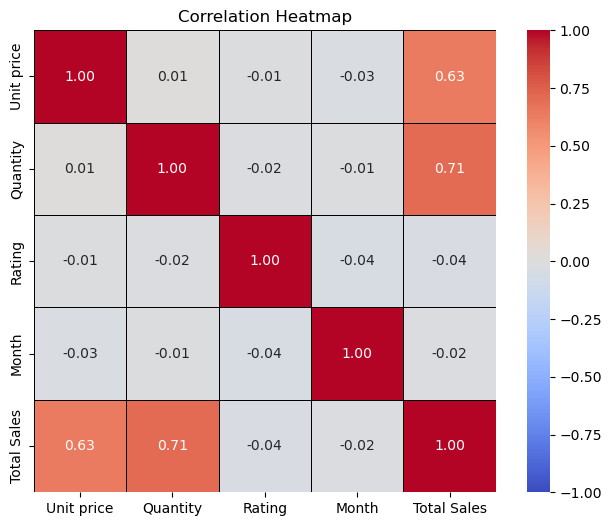

In [300]:
# Select numeric columns to compute the correlation matrix
numeric_columns = df.select_dtypes(include=["float64", "int32", "int64"])

# Compute the correlation matrix
corr_matrix = numeric_columns.corr()

# Create the correlation heatmap with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,  # Display correlation coefficients on the heatmap
    fmt=".2f",  # Format for the numbers (2 decimal places)
    cmap="coolwarm",  # Color map for the heatmap
    vmin=-1,  # Minimum correlation value
    vmax=1,  # Maximum correlation value
    center=0,  # Center for color scaling
    linewidths=0.5,  # Line width between cells
    linecolor="black",  # Line color
    square=True  # Ensure cells are square
)
plt.title("Correlation Heatmap")
plt.show()

In [304]:
# Create a pie chart to show the proportion of revenue by payment type
fig_pie = px.pie(
    df.groupby("Payment")["Total Sales"].sum().reset_index(),
    values="Total Sales",
    names="Payment",
    title="Proportion of Total Revenue by Payment Type"
)

fig_pie.show()


In [305]:
# Create a box plot to show the distribution of total sales by payment type
fig_box = px.box(
    df,
    x="Payment",
    y="Total Sales",
    title="Distribution of Total Sales by Payment Type",
    labels={"Total Sales": "Total Sales"}
)

fig_box.show()


In [307]:
# Create a bar chart to compare total revenue by payment type
fig_bar = px.bar(
    df.groupby("Payment")["Total Sales"].sum().reset_index(),
    x="Payment",
    y="Total Sales",
    title="Total Revenue by Payment Type",
    labels={"Total Sales": "Total Revenue"},
    text="Total Sales"  # Display values on the bars
)

fig_bar.update_traces(
    textposition="outside"  # Position text outside the bars
)

fig_bar.show()
